In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [2]:
#dataset = pd.read_csv('/content/drive/MyDrive/kaggle/parkinsons.data')
dataset = pd.read_csv("/content/drive/MyDrive/kaggle/parkinsons.data", sep=',', index_col='name')

In [3]:
dataset.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
dataset.shape

(195, 23)

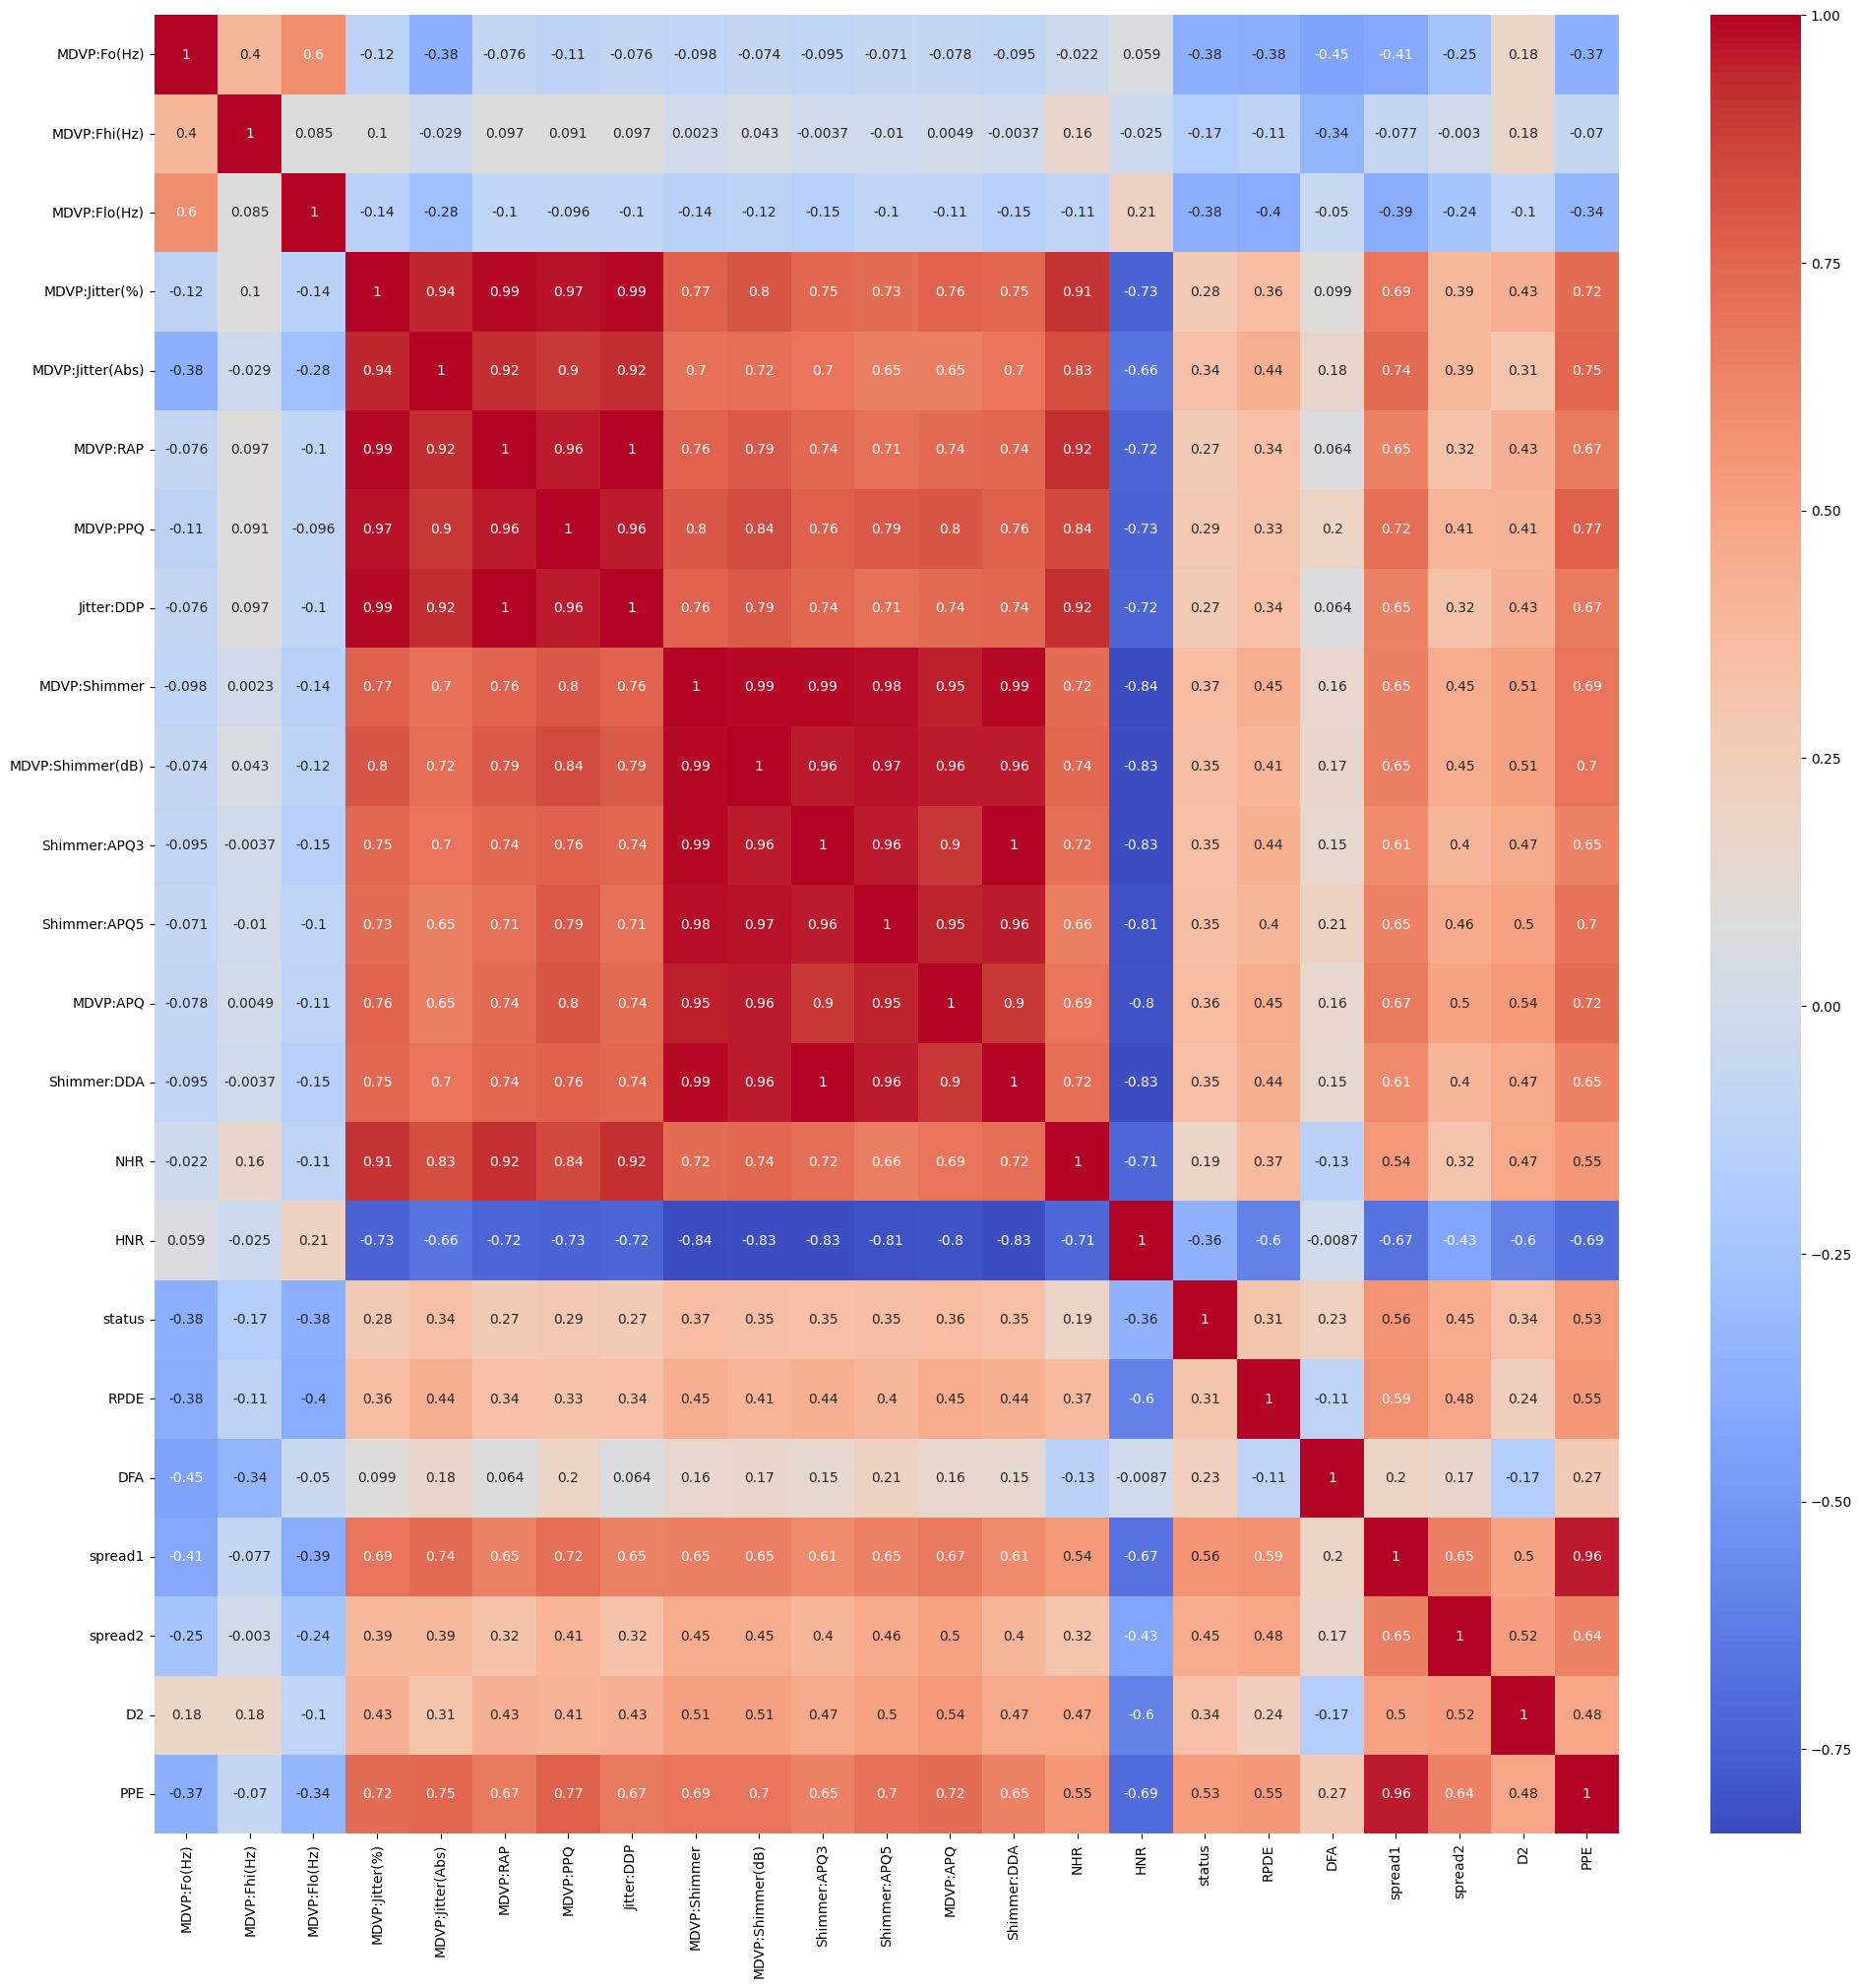

In [5]:
# Correlation matrix
corr = dataset.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [6]:
x = dataset.iloc[: , np.r_[0:16, 17:23]].values
y = dataset.iloc[: , 16].values

In [7]:
print(x)
dataset.shape

[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]


(195, 23)

In [8]:
x.shape

(195, 22)

In [9]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),[0])], remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [10]:
x.shape[1]

22

# splitting dataset

In [11]:

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1)
# x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)

In [12]:
print(y_train)

[0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [13]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
print(x_train)

[[1.293360e+02 1.398670e+02 1.186040e+02 ... 2.698660e-01 2.223719e+00
  1.474910e-01]
 [1.528450e+02 1.633050e+02 7.583600e+01 ... 2.036530e-01 2.125618e+00
  1.701000e-01]
 [2.171160e+02 2.334810e+02 9.397800e+01 ... 3.892950e-01 2.925862e+00
  2.206570e-01]
 ...
 [1.200800e+02 1.397100e+02 1.112080e+02 ... 3.290660e-01 2.205024e+00
  1.881800e-01]
 [1.703680e+02 2.687960e+02 7.954300e+01 ... 3.977490e-01 2.963799e+00
  2.772270e-01]
 [1.761700e+02 1.856040e+02 1.635640e+02 ... 1.963710e-01 2.536527e+00
  1.732180e-01]]


In [14]:
sc = StandardScaler()
# x_train[:,195:] = sc.fit_transform(x_train[:,195:])
# x_test[:,195:] = sc.transform(x_test[:,195:])
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
x_train

array([[-0.61443971, -0.61780655,  0.04127923, ...,  0.5029092 ,
        -0.40751375, -0.68223215],
       [-0.04034851, -0.35415175, -0.98088597, ..., -0.28958497,
        -0.65415395, -0.42818012],
       [ 1.52915319,  0.43526029, -0.54728793, ...,  1.93233825,
         1.357776  ,  0.13991703],
       ...,
       [-0.84047179, -0.61957265, -0.1354869 , ...,  1.21146574,
        -0.45451571, -0.2250194 ],
       [ 0.3875642 ,  0.83251984, -0.8922878 , ...,  2.03352299,
         1.45315514,  0.77558086],
       [ 0.52924939, -0.10330959,  1.11583374, ..., -0.37674221,
         0.37893111, -0.39314388]])

In [16]:
def cm_displayer(cm):
  # Create a DataFrame from the confusion matrix.
  cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

  plt.figure(figsize=(10,7))

  # Create a heatmap from the DataFrame.
  sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

  plt.title('Confusion Matrix')
  plt.show()

Logistic Regression

In [17]:
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [18]:
test_value = [[ 5.29249395e-01, -1.03309592e-01,  1.11583374e+00,
        -5.23716022e-01, -6.82179904e-01, -4.29193964e-01,
        -4.66158519e-01, -4.28206106e-01, -6.17874540e-01,
        -6.05206208e-01, -6.44461440e-01, -5.48107644e-01,
        -5.58034900e-01, -6.44471776e-01, -5.39840575e-01,
         7.18861885e-01, -1.49332475e+00,  1.18499869e+00,
        -3.23304568e-01, -3.76742214e-01,  3.78931110e-01,
        -3.93143882e-01]]

print(lr_classifier.predict(test_value))

[1]


In [19]:
y_pred = lr_classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


0.8717948717948718


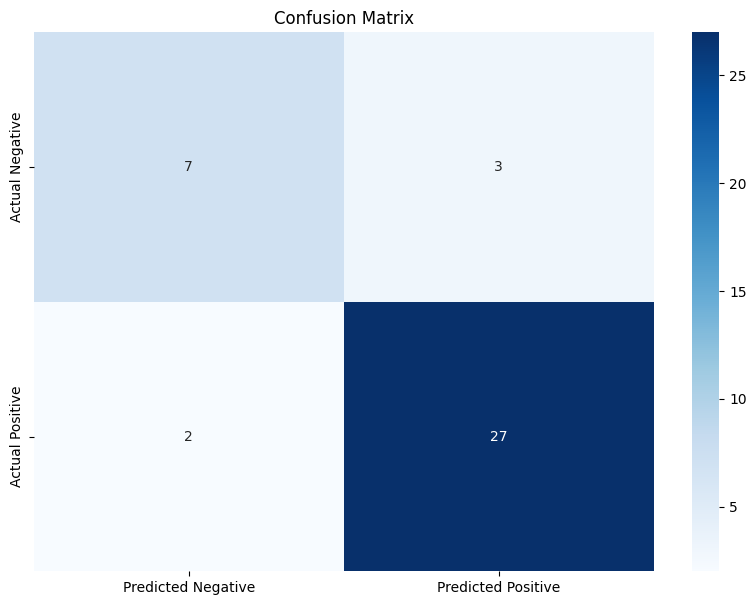

In [20]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

In [21]:
import pickle

LR_model_filename = "LR_model.pkl"

with open(LR_model_filename,"wb") as file:
  pickle.dump(lr_classifier,file)

In [22]:
with open(LR_model_filename,"rb") as file:
  Pickle_LR_model = pickle.load(file)

In [23]:
test_value = [[ 5.29249395e-01, -1.03309592e-01,  1.11583374e+00,
        -5.23716022e-01, -6.82179904e-01, -4.29193964e-01,
        -4.66158519e-01, -4.28206106e-01, -6.17874540e-01,
        -6.05206208e-01, -6.44461440e-01, -5.48107644e-01,
        -5.58034900e-01, -6.44471776e-01, -5.39840575e-01,
         7.18861885e-01, -1.49332475e+00,  1.18499869e+00,
        -3.23304568e-01, -3.76742214e-01,  3.78931110e-01,
        -3.93143882e-01]]

print(Pickle_LR_model.predict(test_value))

[1]


KNN

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train,y_train)

KNN_model_filename = "KNN_model.pkl"

with open(KNN_model_filename,"wb") as file:
  pickle.dump(knn_classifier,file)

In [25]:
y_pred = knn_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8717948717948718


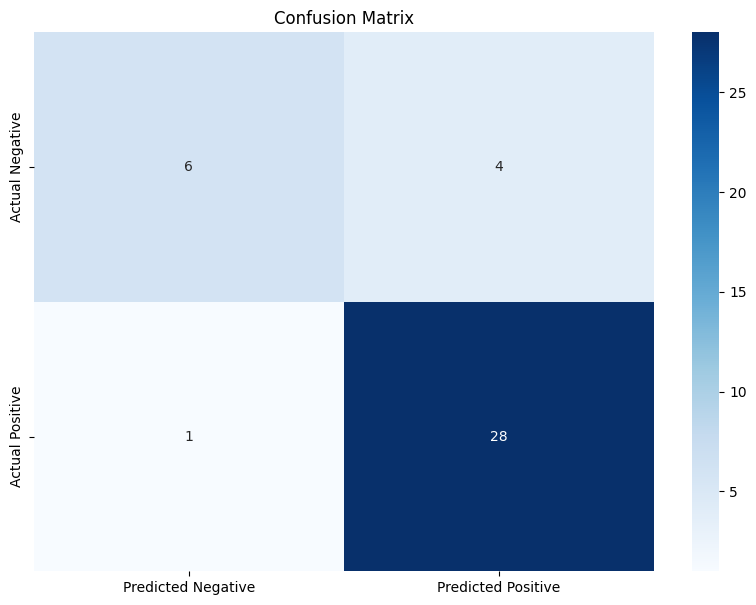

In [26]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

In [27]:
svm_classifier = SVC(kernel = 'linear',random_state = 0)
svm_classifier.fit(x_train,y_train)

SVM_model_filename = "SVM_model.pkl"

with open(SVM_model_filename,"wb") as file:
  pickle.dump(svm_classifier,file)

In [28]:
y_pred = svm_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8205128205128205


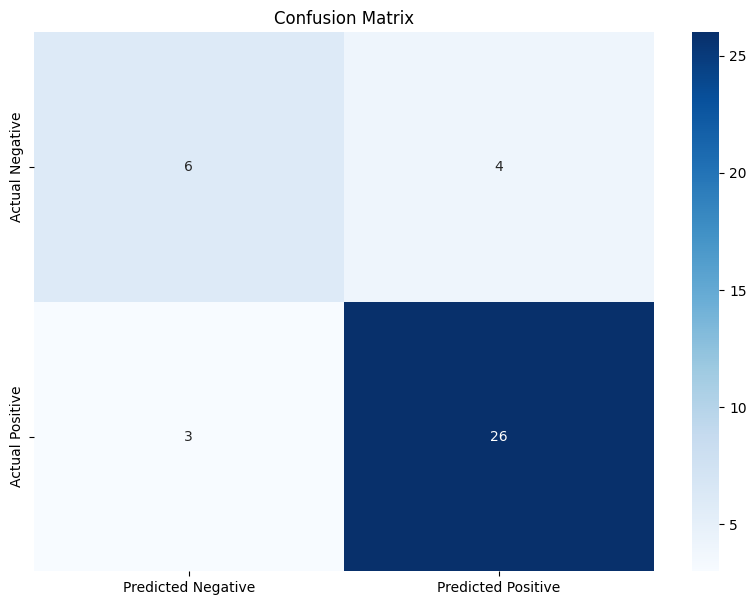

In [29]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

Decision Tree

In [30]:
dt_classifier = DecisionTreeClassifier(max_depth = 2 , random_state = 1)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)

dt_classifier.fit(x_train, y_train)

dt_model_filename = "DT_model.pkl"

with open(dt_model_filename,"wb") as file:
  pickle.dump(dt_classifier,file)

In [31]:
y_pred = dt_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8461538461538461


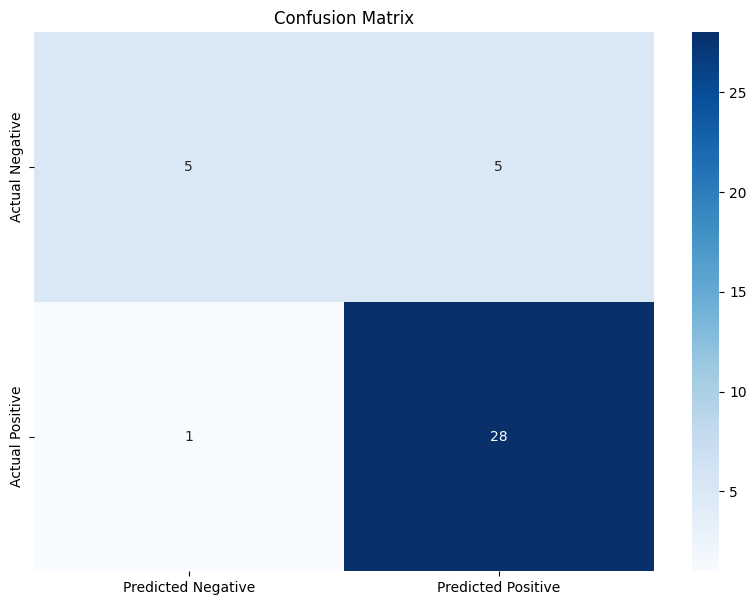

In [32]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

Bagging

In [33]:
dt_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1 )

bc_classifier = BaggingClassifier(estimator = dt_classifier , n_estimators = 300, n_jobs= -1 , random_state=1)

bc_classifier.fit(x_train,y_train)

bc_model_filename = "BC_model.pkl"

with open(bc_model_filename,"wb") as file:
  pickle.dump(bc_classifier,file)

In [34]:
y_pred = bc_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


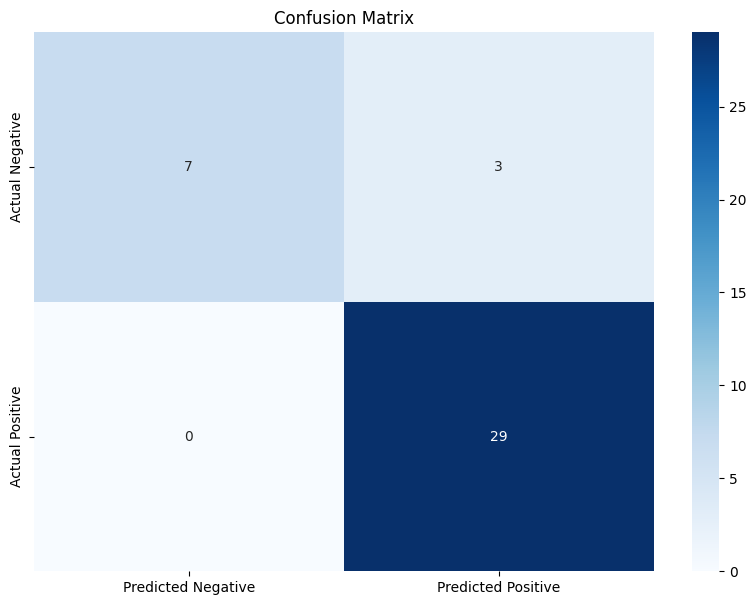

In [35]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

In [36]:
col = list(dataset.columns)
col.remove('status')
print(col)


['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


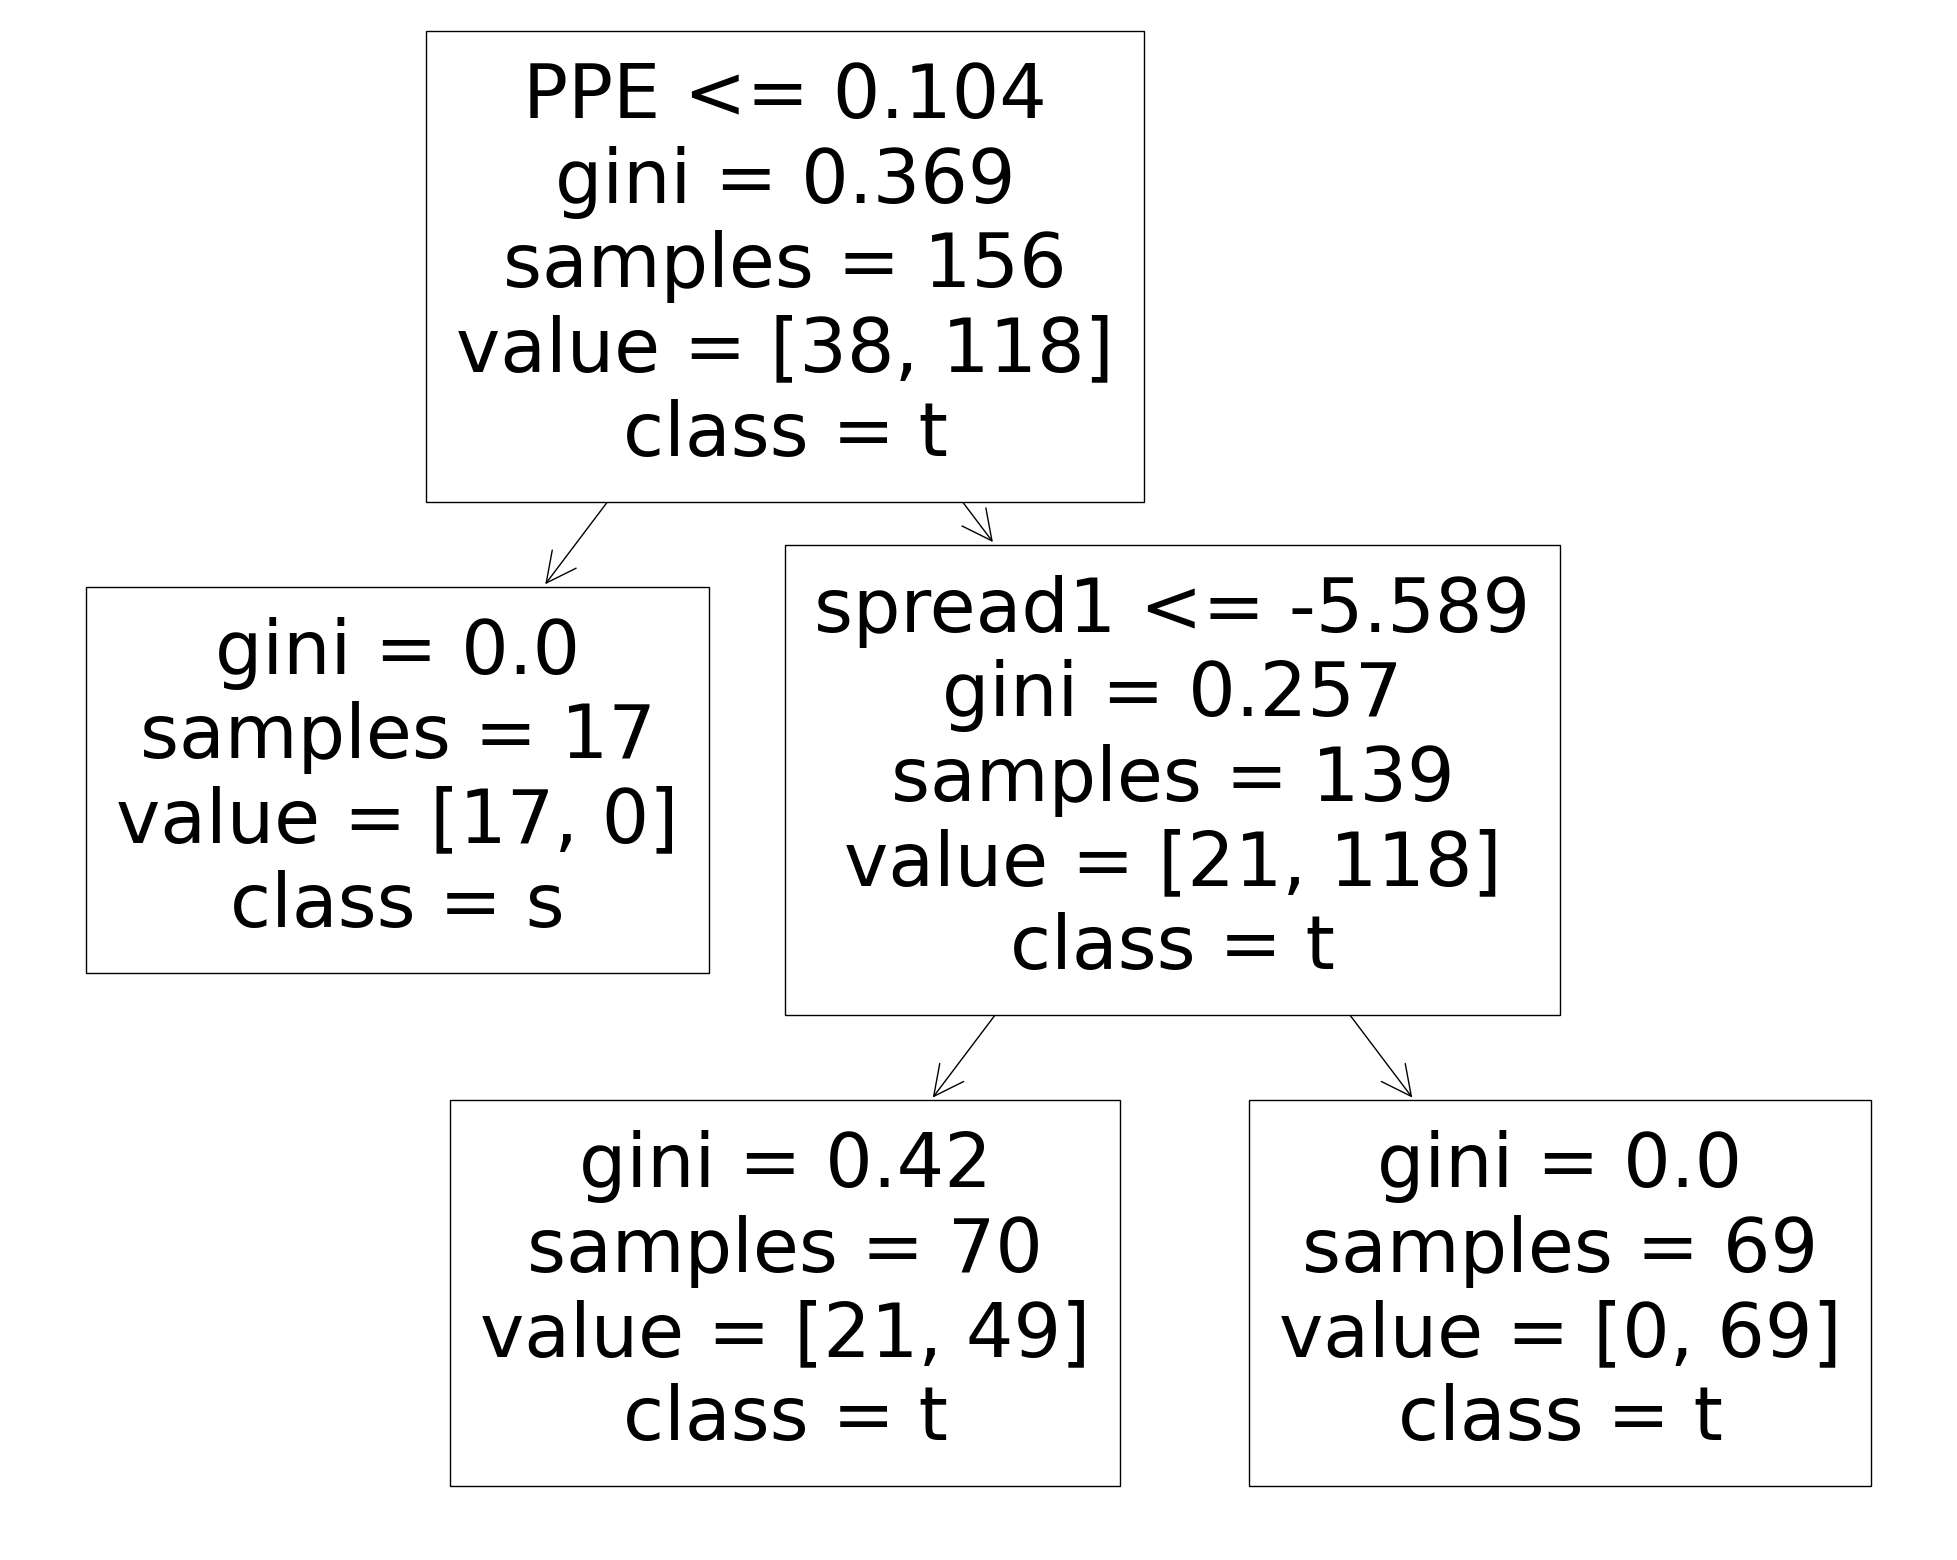

In [37]:
fig = plt.figure(figsize=(25,20))
dt_classifier = DecisionTreeClassifier(max_depth = 2 , random_state = 1)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state= 1)
dt_classifier.fit(x_train, y_train)
tree = tree.plot_tree(dt_classifier ,feature_names = col, class_names = 'status')

# Lightgbm

In [38]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(random_state=1)

lgbm_classifier.fit(x_train,y_train)

lgbm_model_filename = "LGBM_model.pkl"

with open(lgbm_model_filename,"wb") as file:
  pickle.dump(lgbm_classifier,file)

[LightGBM] [Info] Number of positive: 118, number of negative: 38
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756410 -> initscore=1.133098
[LightGBM] [Info] Start training from score 1.133098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [39]:
y_pred = lgbm_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


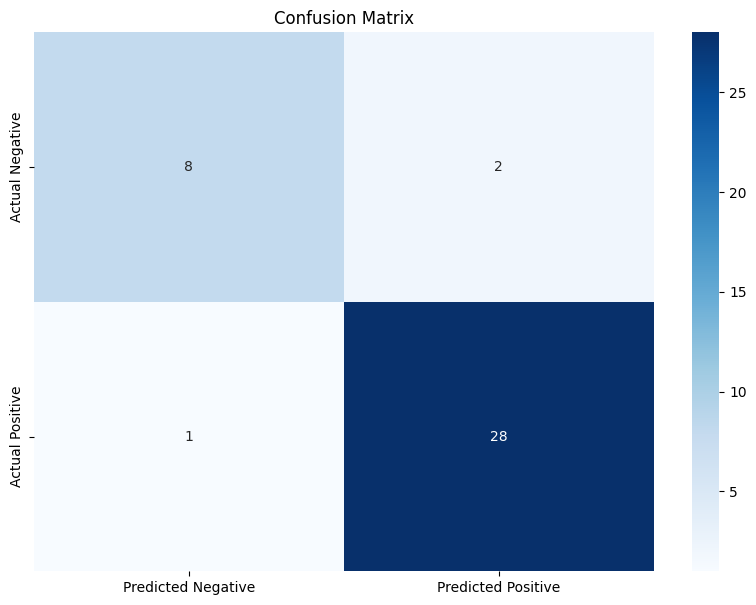

In [40]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Ada Boost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

abc_classifier = AdaBoostClassifier(n_estimators=50)

abc_classifier.fit(x_train,y_train)

abc_model_filename = "ABC_model.pkl"

with open(abc_model_filename,"wb") as file:
  pickle.dump(abc_classifier,file)

In [42]:
y_pred = abc_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8461538461538461


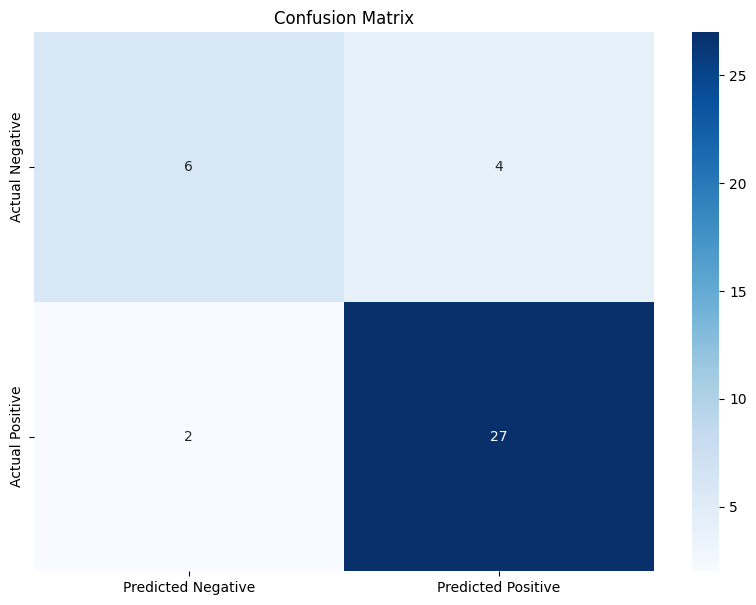

In [43]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

ANN


# ANN

In [44]:
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical


n_cols = x_train.shape[1]

model = Sequential()
model.add(Flatten(input_shape=(n_cols,)))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(2,activation = 'sigmoid'))
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,to_categorical(y_train),epochs=20)


Epoch 1/20
5/5 [==============================] - 1s 4ms/step - loss: 6.8715 - accuracy: 0.6731
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 3.2460 - accuracy: 0.5577
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 1.8451 - accuracy: 0.6538
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 1.4981 - accuracy: 0.5769
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.9743 - accuracy: 0.7372
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7345 - accuracy: 0.7115
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7720 - accuracy: 0.6859
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7051
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7692
Epoch 10/20
5/5 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7756
Epoch 11/20
5/5 [======================

In [45]:
np.set_printoptions(precision=4, suppress=True)
y_pred = model.predict(x_test)
y_pred

#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

2/2 [==============================] - 0s 5ms/step


array([[0.0086, 0.276 ],
       [0.2165, 0.8514],
       [0.1547, 0.2144],
       [0.058 , 0.8185],
       [0.0703, 0.4545],
       [0.2319, 0.1999],
       [0.1422, 0.1914],
       [0.1747, 0.791 ],
       [0.1478, 0.069 ],
       [0.0462, 0.368 ],
       [0.2451, 0.8722],
       [0.0184, 0.3193],
       [0.099 , 0.8852],
       [0.1385, 0.0578],
       [0.1119, 0.2039],
       [0.0873, 0.1988],
       [0.0696, 0.9907],
       [0.1683, 0.2618],
       [0.0362, 0.661 ],
       [0.2184, 0.7726],
       [0.0998, 0.3186],
       [0.1284, 0.8151],
       [0.071 , 0.8314],
       [0.0212, 0.3527],
       [0.09  , 0.7869],
       [0.017 , 0.5092],
       [0.1024, 0.561 ],
       [0.2057, 0.7896],
       [0.0026, 0.042 ],
       [0.038 , 0.3708],
       [0.0373, 0.3266],
       [0.0002, 0.0013],
       [0.1133, 0.7378],
       [0.1084, 0.4667],
       [0.0039, 0.0506],
       [0.3338, 0.8418],
       [0.    , 0.    ],
       [0.3192, 0.9321],
       [0.278 , 0.1021]], dtype=float32)

In [46]:
y_pred_bin = []
for i in range(len(y_pred)):
   print(i)

   if(y_pred[i][0] > y_pred[i][1]):
      print("healthy")
      y_pred_bin.append(0)
   else:
      print("parkinson")
      y_pred_bin.append(1)

# print(y_pred[0][1])
# y_pred_bin[0] = 1
print(np.concatenate((np.array(y_pred_bin).reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
#y_pred_bin

0
parkinson
1
parkinson
2
parkinson
3
parkinson
4
parkinson
5
healthy
6
parkinson
7
parkinson
8
healthy
9
parkinson
10
parkinson
11
parkinson
12
parkinson
13
healthy
14
parkinson
15
parkinson
16
parkinson
17
parkinson
18
parkinson
19
parkinson
20
parkinson
21
parkinson
22
parkinson
23
parkinson
24
parkinson
25
parkinson
26
parkinson
27
parkinson
28
parkinson
29
parkinson
30
parkinson
31
parkinson
32
parkinson
33
parkinson
34
parkinson
35
parkinson
36
healthy
37
parkinson
38
healthy
[[1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]]


0.7692307692307693


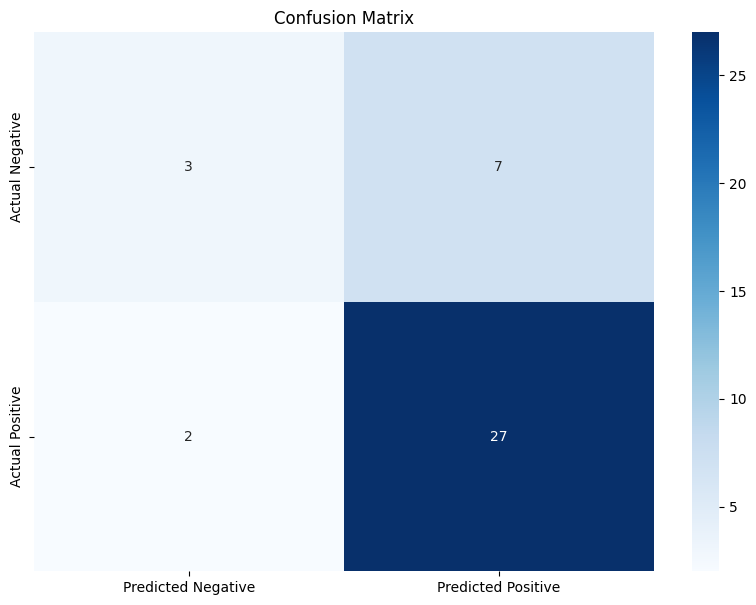

In [47]:
cm = confusion_matrix(y_test,y_pred_bin)
print(accuracy_score(y_test, y_pred_bin))
cm_displayer(cm)

Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(x_train,y_train)

nb_model_filename = "NB_model.pkl"

with open(nb_model_filename,"wb") as file:
  pickle.dump(nb_classifier,file)

In [49]:
y_pred = nb_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.7435897435897436


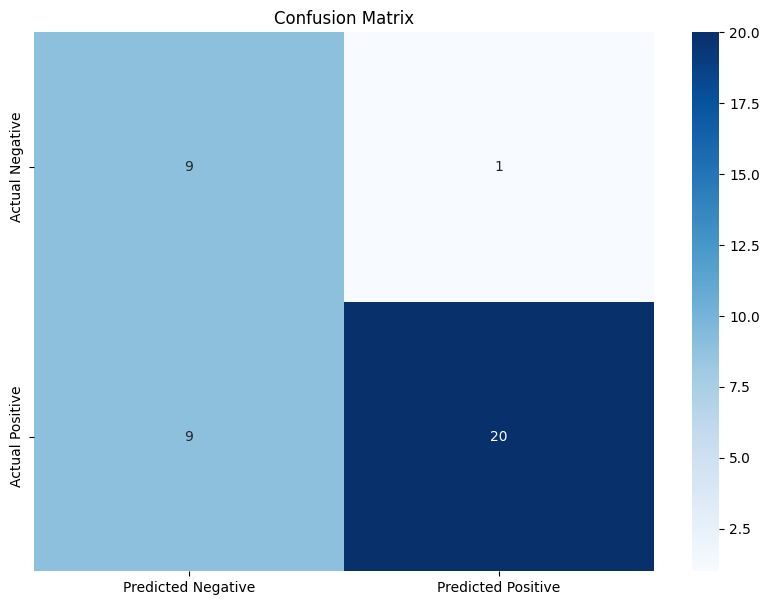

In [50]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

rf_classifier.fit(x_train,y_train)

rf_model_filename = "RF_model.pkl"

with open(rf_model_filename,"wb") as file:
  pickle.dump(rf_classifier,file)

In [52]:
y_pred = rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.9230769230769231


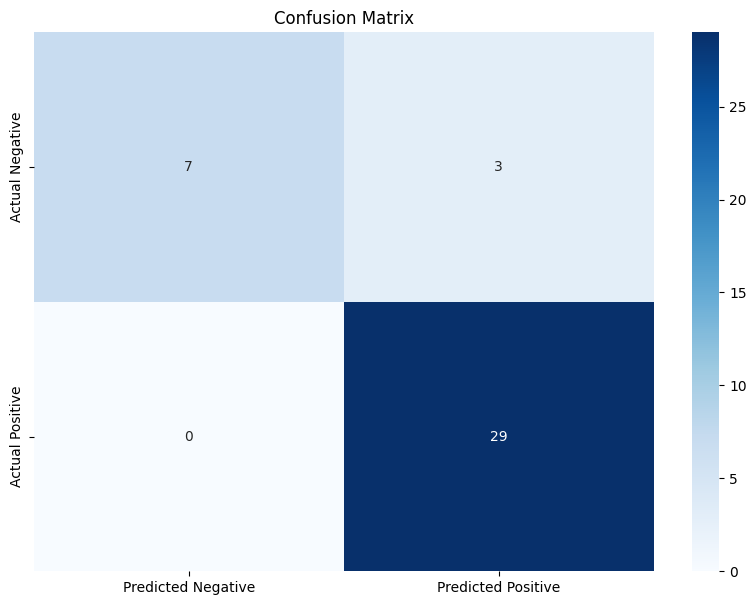

In [53]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

XGBoost

In [54]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_classifier.fit(x_train,y_train)

xgb_model_filename = "XG_model.pkl"

with open(xgb_model_filename,"wb") as file:
  pickle.dump(xgb_classifier,file)

In [55]:
y_pred = xgb_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8974358974358975


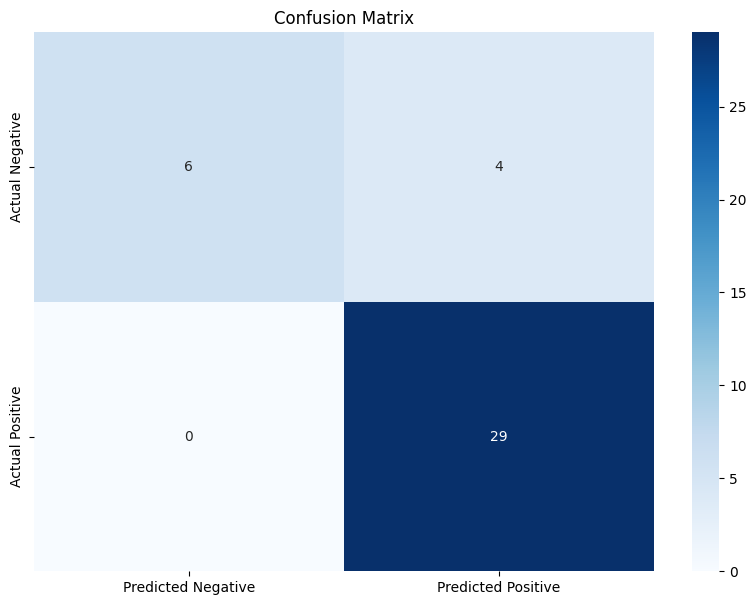

In [56]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

# PCA Random Forests

In [57]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state= 1,stratify=y)

pca = PCA(n_components = 9)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

rf_classifier = RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=1)

rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)

In [58]:
y_pred = rf_classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

0.8974358974358975


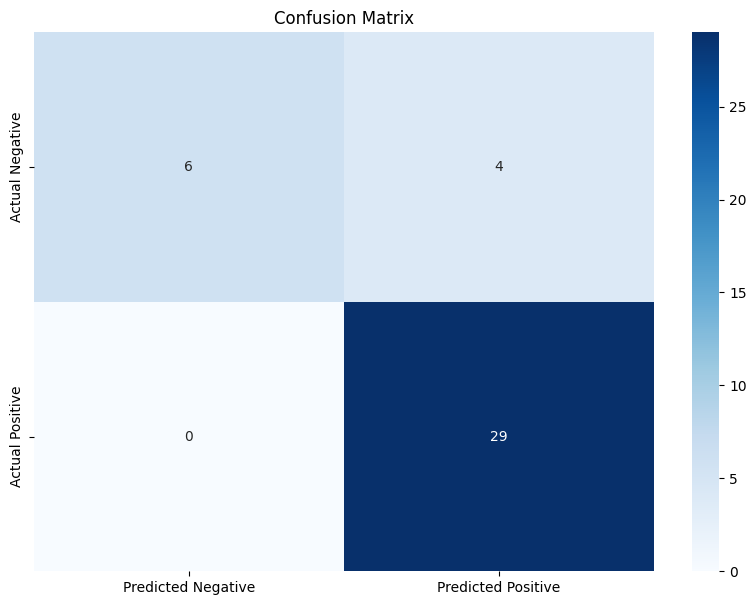

In [59]:
cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test, y_pred))
cm_displayer(cm)

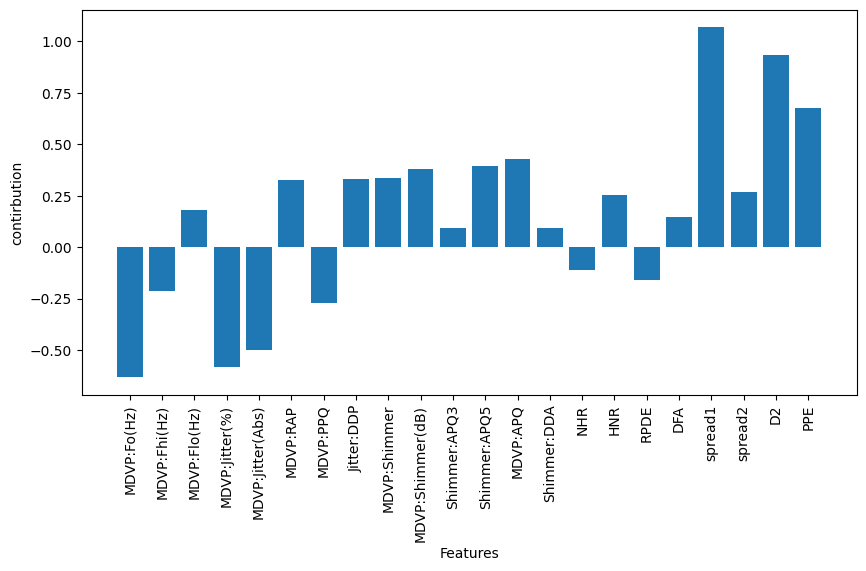

In [60]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = lr_classifier.coef_[0]

features = col

plt.figure(figsize = (10,5))
plt.xlabel("Features")
plt.ylabel("contirbution")
plt.bar(features,coefficients)
plt.xticks(rotation = 90)
plt.show()